# Разведочный анализ данных. Исследование и визуализация данных.

## 1) Текстовое описание набора данных

В качестве набора данных мы будем использовать **Titanic Dataset**, содержащий информацию о пассажирах легендарного корабля **Titanic**, который затонул в 1912 году. Цель анализа — изучить факторы, влияющие на выживаемость пассажиров, и провести базовый анализ данных.  

### Данные  
Датасет содержит следующие признаки:  
- **PassengerId** — уникальный идентификатор пассажира.  
- **Survived** — целевой признак: 1 — пассажир выжил, 0 — погиб.  
- **Pclass** — класс обслуживания: 1-й (первый класс), 2-й (второй класс), 3-й (третий класс).  
- **Name** — имя пассажира.  
- **Sex** — пол пассажира (мужчина/женщина).  
- **Age** — возраст пассажира (в годах).  
- **SibSp** — количество братьев/сестёр или супругов на борту.  
- **Parch** — количество родителей или детей на борту.  
- **Ticket** — номер билета.  
- **Fare** — стоимость билета.  
- **Cabin** — номер каюты (может содержать пропуски).  
- **Embarked** — порт посадки: C — Шербур, Q — Квинстаун, S — Саутгемптон.  

# Импорт библиотек
Импортируем библиотеки с помощью команды import. Как правило, все команды import размещают в первой ячейке ноутбука, но мы в этом примере будем подключать все библиотеки последовательно, по мере их использования.

In [270]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline 
sns.set(style="ticks")

# Загрузка данных

Загрузим файлы датасета в помощью библиотеки Pandas. 

In [272]:
# Будем анализировать данные только на обучающей выборке
data = pd.read_csv('Titanic-Dataset.csv', sep=",")

# 2) Основные характеристики датасета

In [274]:
# Первые 5 строк датасета
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [275]:
# Размер датасета - 8143 строк, 7 колонок
data.shape

(891, 12)

In [276]:
total_count = data.shape[0]
print('Всего строк: {}'.format(total_count))

Всего строк: 891


In [277]:
# Список колонок
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [278]:
# Список колонок с типами данных
data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [279]:
# Проверим наличие пустых значений
# Цикл по колонкам датасета
for col in data.columns:
    # Количество пустых значений - все значения заполнены
    temp_null_count = data[data[col].isnull()].shape[0]
    print('{} - {}'.format(col, temp_null_count))

PassengerId - 0
Survived - 0
Pclass - 0
Name - 0
Sex - 0
Age - 177
SibSp - 0
Parch - 0
Ticket - 0
Fare - 0
Cabin - 687
Embarked - 2


In [280]:
# Основные статистические характеристки набора данных
data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [281]:
# Определим уникальные значения для целевого признака
data['Survived'].unique()

array([0, 1])

Целевой признак является бинарным и содержит только значения 0 и 1.

# 3) Визуальное исследование датасета
Для визуального исследования могут быть использованы различные виды диаграмм, мы построим только некоторые варианты диаграмм, которые используются достаточно часто.

### [Диаграмма рассеяния](https://en.wikipedia.org/wiki/Scatter_plot)

Позволяет построить распределение двух колонок данных и визуально обнаружить наличие зависимости. Не предполагается, что значения упорядочены (например, по времени).

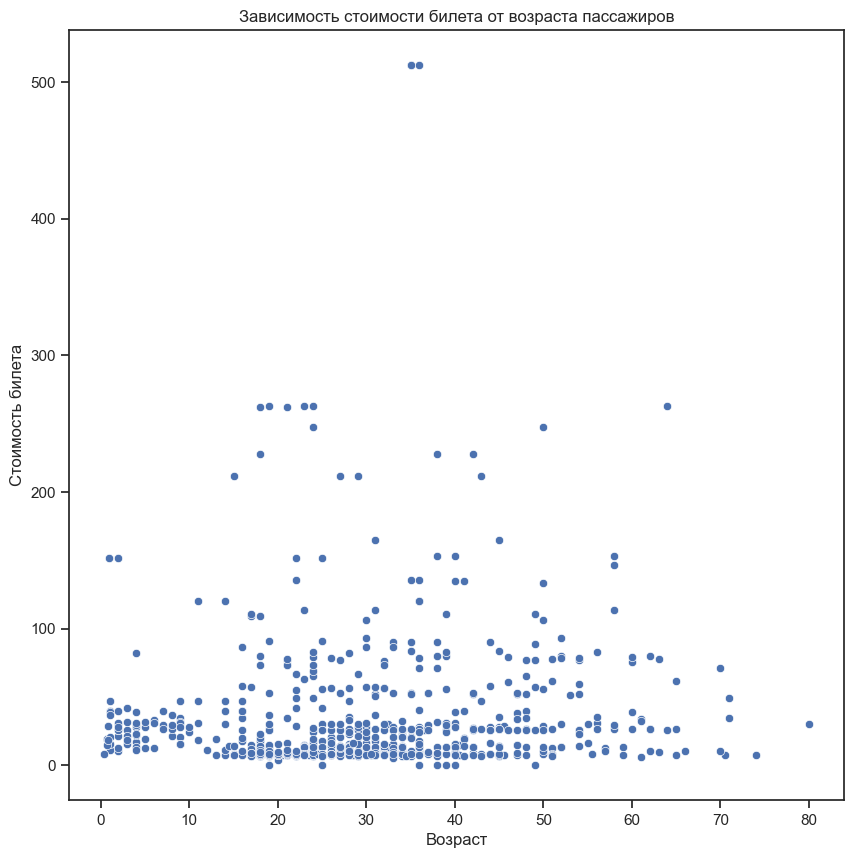

In [285]:
fig, ax = plt.subplots(figsize=(10, 10))
sns.scatterplot(ax=ax, x='Age', y='Fare', data=data)
plt.title("Зависимость стоимости билета от возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Стоимость билета")
plt.show()

Можно видеть, что между полями `Age` и `Fare` присутствует интересная взаимосвязь: молодые пассажиры в основном покупали билеты по более низкой стоимости, тогда как среди пассажиров старшего возраста встречаются билеты с высокой стоимостью. Это может быть связано с социальным статусом или классом обслуживания.

Посмотрим насколько на эту зависимость влияет целевой признак.

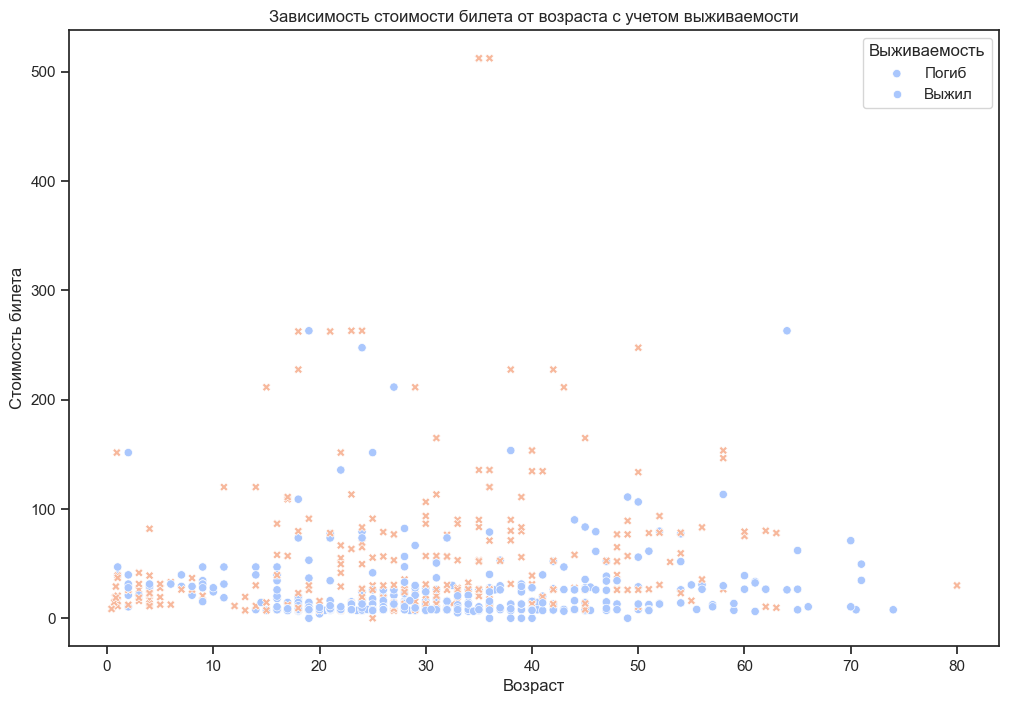

In [288]:
fig, ax = plt.subplots(figsize=(12, 8))
sns.scatterplot(ax=ax, x='Age', y='Fare', hue='Survived', style='Survived', palette='coolwarm', data=data)
plt.title("Зависимость стоимости билета от возраста с учетом выживаемости")
plt.xlabel("Возраст")
plt.ylabel("Стоимость билета")
plt.legend(title="Выживаемость", labels=["Погиб", "Выжил"])
plt.show()

## [Гистограмма](https://en.wikipedia.org/wiki/Histogram) 
Позволяет оценить плотность вероятности распределения данных.

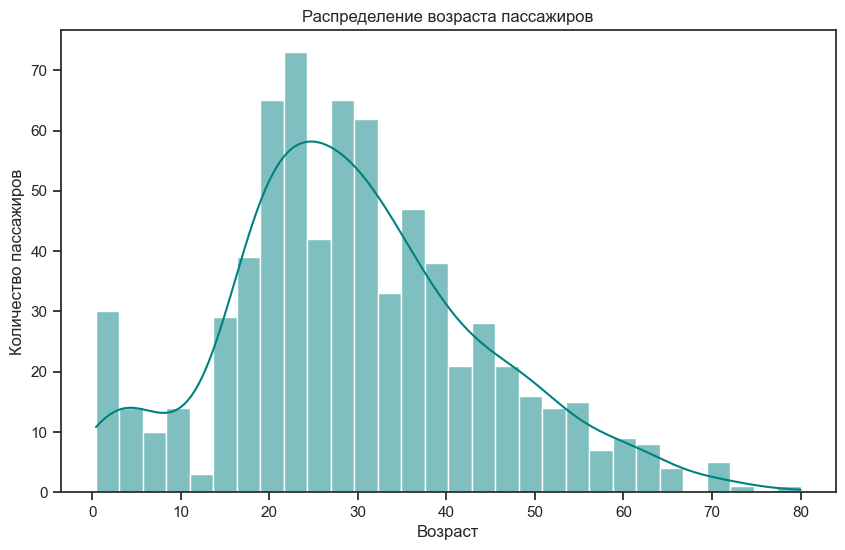

In [290]:
plt.figure(figsize=(10, 6))
sns.histplot(data["Age"].dropna(), bins=30, kde=True, color="teal")
plt.title("Распределение возраста пассажиров")
plt.xlabel("Возраст")
plt.ylabel("Количество пассажиров")
plt.show()

### Jointplot
Комбинация гистограмм и диаграмм рассеивания.

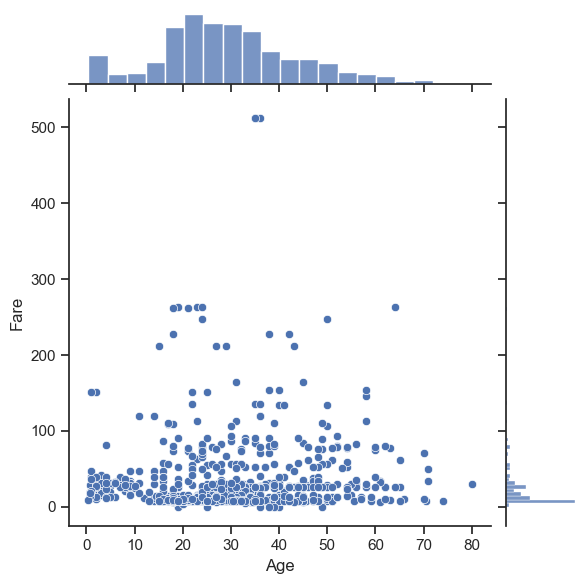

In [292]:
sns.jointplot(x='Age', y='Fare', data=data, kind='scatter')
plt.show()

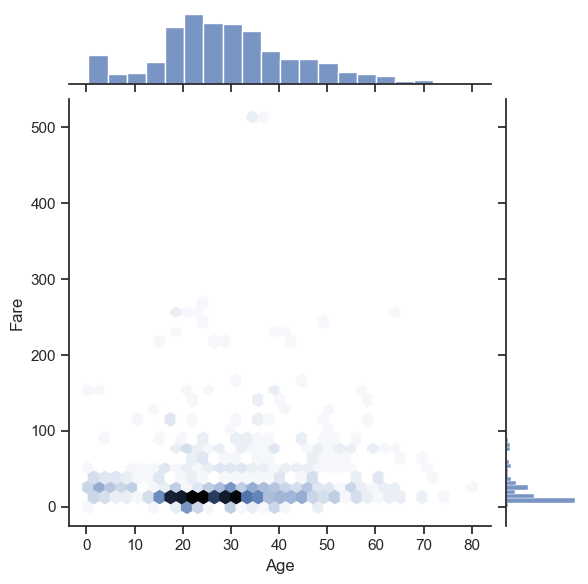

In [293]:
sns.jointplot(x='Age', y='Fare', data=data, kind='hex')
plt.show()

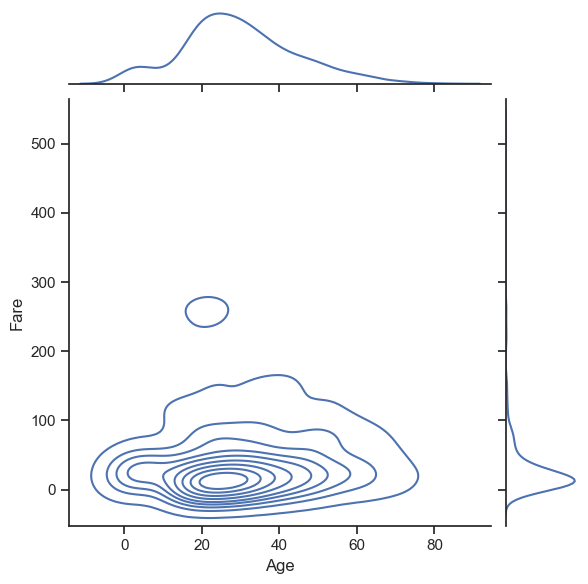

In [294]:
sns.jointplot(x='Age', y='Fare', data=data, kind='kde')
plt.show()

### "Парные диаграммы"
Комбинация гистограмм и диаграмм рассеивания для всего набора данных.

Выводится матрица графиков. На пересечении строки и столбца, которые соответстуют двум показателям, строится диаграмма рассеивания. В главной диагонали матрицы строятся гистограммы распределения соответствующих показателей.

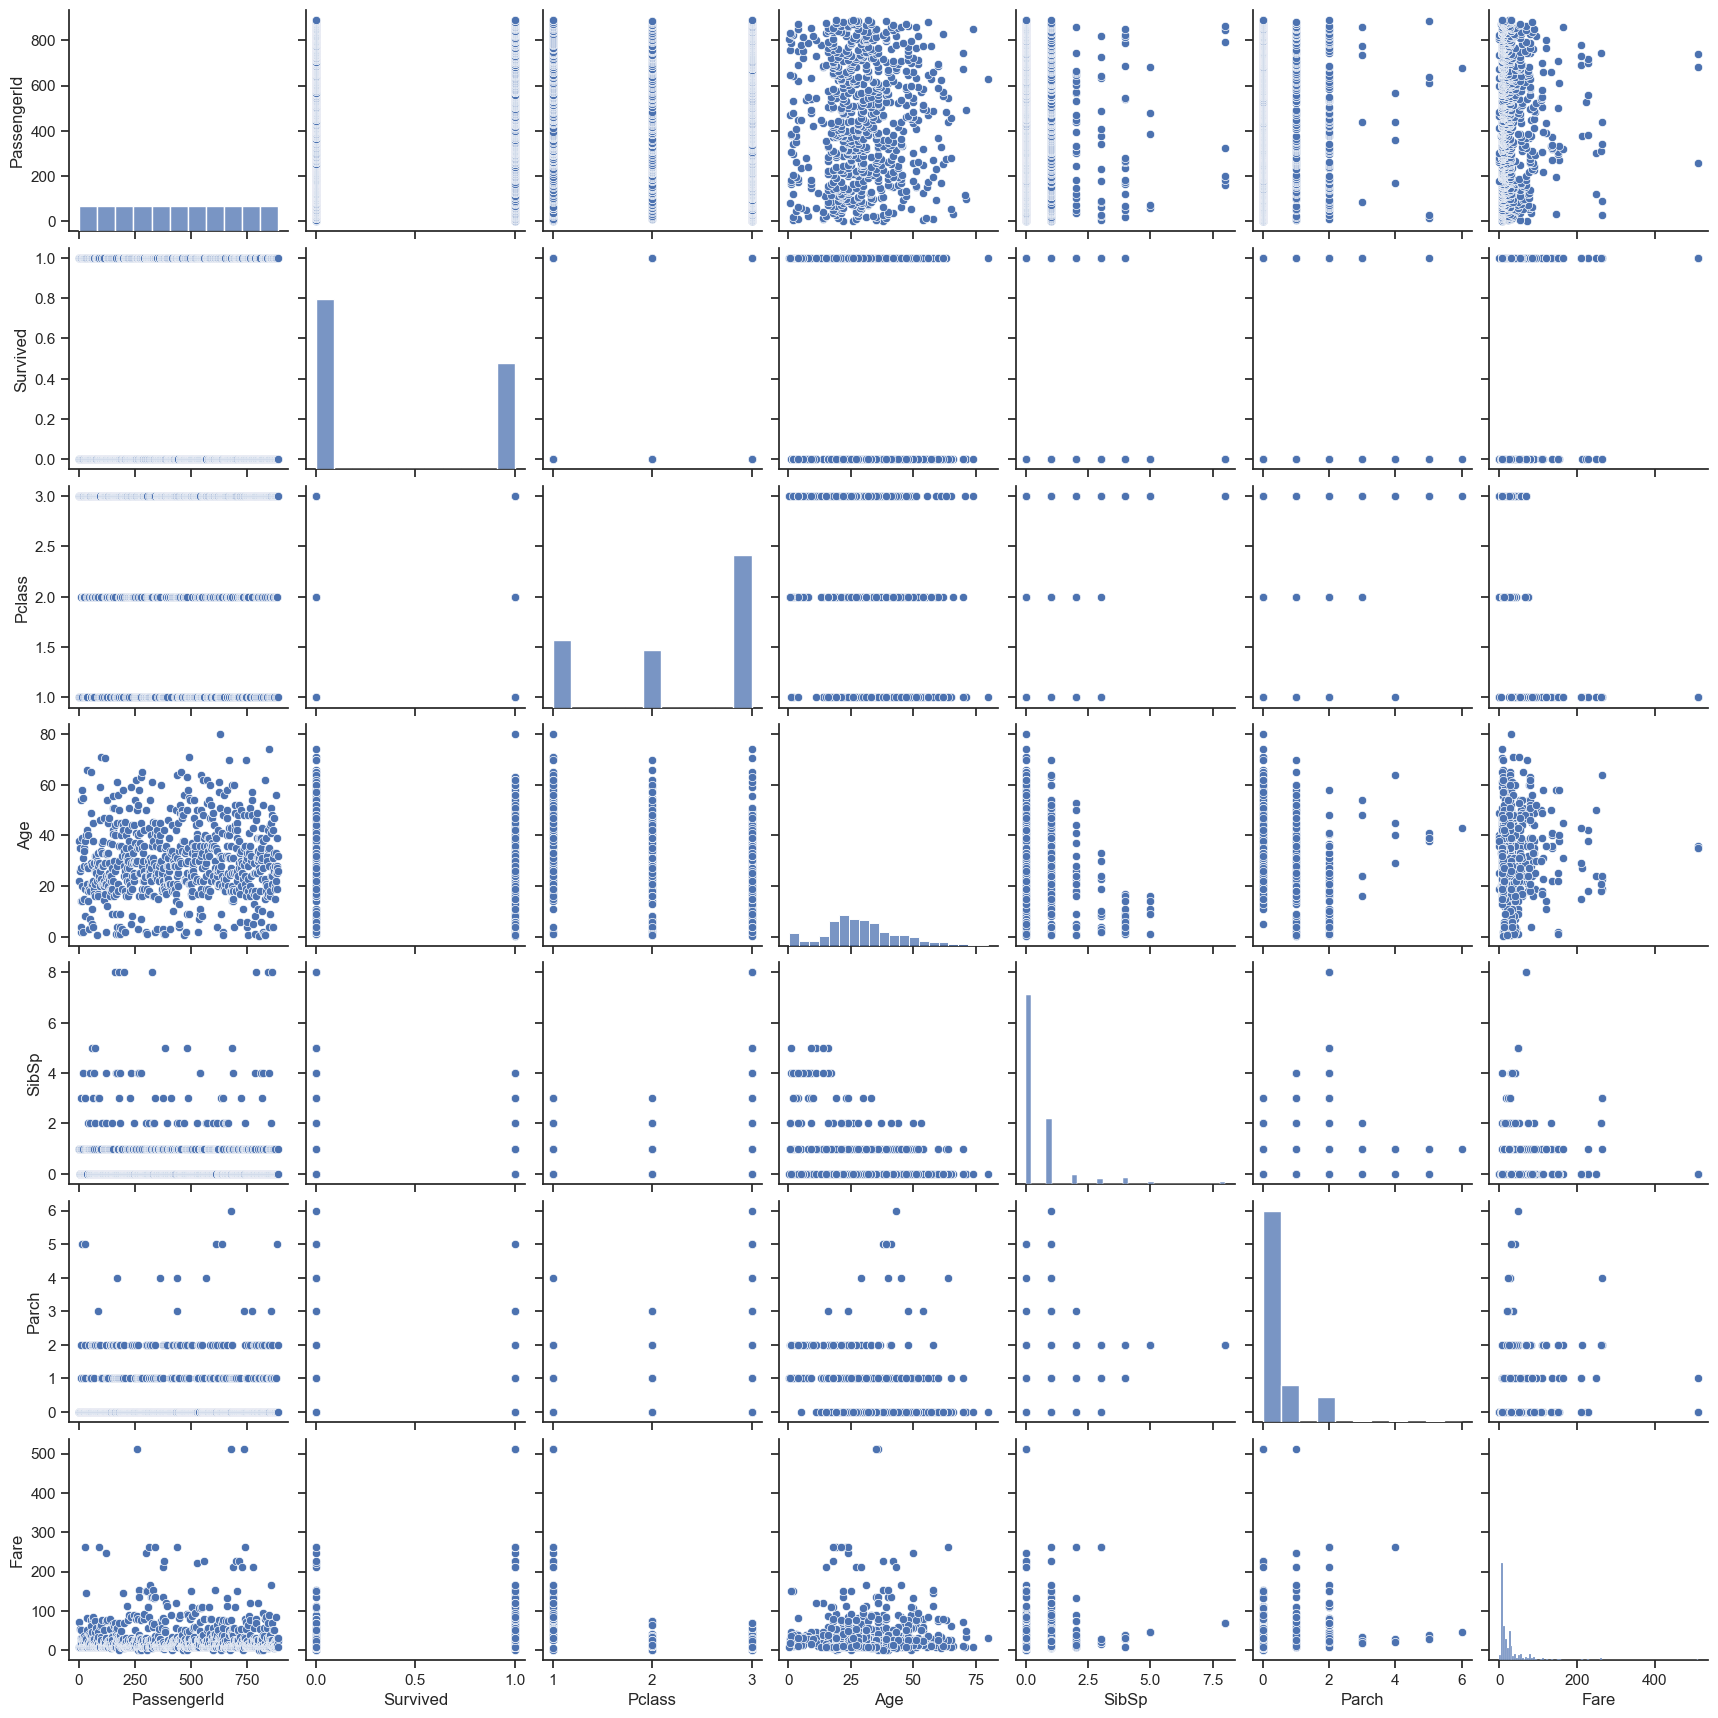

In [296]:
sns.pairplot(data)
plt.show()

С помощью параметра "hue" возможна группировка по значениям какого-либо признака.

In [ ]:
sns.pairplot(data, hue="Age")
plt.show()

### [Ящик с усами](https://en.wikipedia.org/wiki/Box_plot)
Отображает одномерное распределение вероятности.

In [ ]:
sns.boxplot(x=data['Fare'])
plt.show()

In [ ]:
# По вертикали
sns.boxplot(y=data['Fare'])
plt.show()

In [ ]:
# Распределение параметра Age сгруппированные по Survived.
sns.boxplot(x='Survived', y='Age', data=data)
plt.show()

### [Violin plot](https://en.wikipedia.org/wiki/Violin_plot)
Похоже на предыдущую диаграмму, но по краям отображаются распределения плотности - https://en.wikipedia.org/wiki/Kernel_density_estimation

In [ ]:
sns.violinplot(x=data['Age'])
plt.show()

In [ ]:
fig, ax = plt.subplots(2, 1, figsize=(10, 10))
sns.violinplot(ax=ax[0], x=titanic_data['Age'])
sns.histplot(titanic_data['Age'], ax=ax[1], kde=True)
# Показать графики
plt.tight_layout()
plt.show()

Из приведенных графиков видно, что violinplot действительно показывает распределение плотности.

In [ ]:
# Распределение параметра Age сгруппированные по Survived.
sns.violinplot(x='Survived', y='Age', data=data)
plt.show()

In [ ]:
sns.catplot(x='Survived', y='Age', data=data, kind="violin", split=True)
plt.show()

# 4) Информация о корреляции признаков

Проверка корреляции признаков позволяет решить две задачи:
1. Понять какие признаки (колонки датасета) наиболее сильно коррелируют с целевым признаком ("Survived"). Именно эти признаки будут наиболее информативными для моделей машинного обучения. Признаки, которые слабо коррелируют с целевым признаком, можно попробовать исключить из построения модели, иногда это повышает качество модели. Нужно отметить, что некоторые алгоритмы машинного обучения автоматически определяют ценность того или иного признака для построения модели.
2. Понять какие нецелевые признаки линейно зависимы между собой. Линейно зависимые признаки, как правило, очень плохо влияют на качество моделей. Поэтому если несколько признаков линейно зависимы, то для построения модели из них выбирают какой-то один признак.

In [ ]:
# Выбираем только числовые столбцы
numeric_data = titanic_data.select_dtypes(include=['float64', 'int64'])
numeric_data.corr()

Корреляционная матрица содержит коэффициенты корреляции между всеми парами признаков.

Корреляционная матрица симметрична относительно главной диагонали. На главной диагонали расположены единицы (корреляция признака самого с собой).


1. **Целевой признак `Survived`**:
   - Наиболее сильно коррелирует с признаком `Fare` (0.257), что может указывать на то, что стоимость билета имеет некоторое влияние на выживаемость.
   - Корреляция с `Pclass` отрицательная (-0.338), что также логично, поскольку пассажиры более низких классов, как правило, имели меньшие шансы на выживание.
   - Корреляция с `Age` слабая (-0.077), что свидетельствует о том, что возраст не является сильным фактором выживаемости.
   - Признак `SibSp` имеет слабую отрицательную корреляцию (-0.035), что означает, что количество родственников на борту также не сильно влияет на выживаемость.
   - Признак `Parch` имеет небольшую положительную корреляцию (0.082), что может означать, что пассажиры с детьми или родителями на борту имели несколько больший шанс на выживание.

2. **Признаки, имеющие сильную взаимосвязь:**
   - `Pclass` и `Age` сильно коррелируют отрицательно (-0.369), что логично, поскольку пассажиры более старшего возраста часто путешествовали в более низких классах.
   - `SibSp` и `Parch` имеют значительную положительную корреляцию (0.415), что означает, что пассажиры с большим количеством родственников на борту (братьев/сестер и родителей/детей) скорее всего имеют более высокие значения в этих признаках.

3. **Признаки, которые можно рассматривать для исключения или преобразования:**
   - Признаки `PassengerId` и `Survived` почти не коррелируют с другими признаками, и их можно исключить, так как `PassengerId` является идентификатором и не влияет на выживаемость, а `Survived` — целевой переменной, которая уже используется в модели.
   - `Age` и `Fare` имеют слабую корреляцию с целевым признаком и могут быть полезными, но их влияние нужно будет проверять через другие методы (например, с использованием моделей, учитывающих нелинейные зависимости).

### Рекомендации:
- **Оставить в модели**: `Fare`, `Pclass`, `SibSp`, `Parch`, так как они показывают более заметные корреляции с выживаемостью.
- **Возможно исключить**: `Age`, так как его корреляция с `Survived` невелика, но его влияние нужно будет дополнительно проверить.
- **Может потребоваться преобразование**: если будет использована модель, которая учитывает только линейные зависимости, можно попытаться преобразовать возраст в категориальные признаки (например, деление на возрастные группы).

Описание метода corr - https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.corr.html

По умолчанию при построении матрицы используется коэффициент корреляции [Пирсона](https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D1%80%D1%80%D0%B5%D0%BB%D1%8F%D1%86%D0%B8%D1%8F). Возможно также построить корреляционную матрицу на основе коэффициентов корреляции Кендалла и Спирмена. На практике три метода редко дают значимые различия.

In [ ]:
numeric_data.corr(method='pearson')

In [ ]:
numeric_data.corr(method='kendall')

In [ ]:
numeric_data.corr(method='spearman')

В случае большого количества признаков анализ числовой корреляционной матрицы становится неудобен. 

Для визуализации корреляционной матрицы будем использовать "тепловую карту" heatmap которая показывает степень корреляции различными цветами.

Используем метод heatmap библиотеки seaborn - https://seaborn.pydata.org/generated/seaborn.heatmap.html

In [ ]:
sns.heatmap(numeric_data.corr())
plt.show()

In [ ]:
# Вывод значений в ячейках
sns.heatmap(numeric_data.corr(), annot=True, fmt='.3f')
plt.show()

In [ ]:
# Изменение цветовой гаммы
sns.heatmap(numeric_data.corr(), cmap='YlGnBu', annot=True, fmt='.3f')
plt.show()

In [ ]:
mask = np.zeros_like(data.corr(), dtype=bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(numeric_data.corr(), mask=mask, annot=True, fmt='.3f')
plt.show()

In [ ]:
fig, ax = plt.subplots(1, 3, sharex='col', sharey='row', figsize=(15,5))
sns.heatmap(numeric_data.corr(method='pearson'), ax=ax[0], annot=True, fmt='.2f')
sns.heatmap(numeric_data.corr(method='kendall'), ax=ax[1], annot=True, fmt='.2f')
sns.heatmap(numeric_data.corr(method='spearman'), ax=ax[2], annot=True, fmt='.2f')
fig.suptitle('Корреляционные матрицы, построенные различными методами')
ax[0].title.set_text('Pearson')
ax[1].title.set_text('Kendall')
ax[2].title.set_text('Spearman')
plt.show()

### Тепловая карта с указание размера

- Функция plt.subplots создает область окна нужного размера, в которую может выводиться график.
- Параметр figsize=(размер по горизонтали, размер по вертикали).
- По умолчанию размер задается в дюймах, но возможно использование и других единиц измерения - https://matplotlib.org/devdocs/gallery/subplots_axes_and_figures/figure_size_units.html
- Функция sns.heatmap содержит параметр ax=ax, который ссылается на область, созданную plt.subplots, поэтому график выводится в данной области.

In [ ]:
fig, ax = plt.subplots(1, 1, sharex='col', sharey='row', figsize=(10,5))
fig.suptitle('Корреляционная матрица')
sns.heatmap(numeric_data.corr(), ax=ax, annot=True, fmt='.3f')
plt.show()

Необходимо отметить, что тепловая карта не очень хорошо подходит для определения корреляции нецелевых признаков между собой.

В примере тепловая карта помогает определить значимую корреляцию между признаками Fare и Pclass, следовательно только один из этих признаков можно включать в модель.

Но в реальной модели могут быть сотни признаков и коррелирующие признаки могут образовывать группы, состояшие более чем из  двух признаков. Увидеть такие группы с помощью тепловой карты сложно.

Для решения задачи предлагается новый вариант визуализации - "Солнечная корреляционная карта" [Solar correlation map](https://github.com/Zapf-Consulting/solar-correlation-map).

К сожалению, данная библиотека пока работает только через файловый интерфейс и не предназначена для встраивания в ноутбук.

Примеры статей с описанием работы библиотеки:
- https://www.oreilly.com/learning/a-new-visualization-to-beautifully-explore-correlations
- https://www.mtab.com/the-puzzle-of-visualizing-correlations/

# Дополнительные ссылки на обучающие ноутбуки

[The Best Tutorial for Beginners (Kaggle)](https://www.kaggle.com/getting-started/71679)